In [1]:
import tensorflow.keras as keras

In [2]:
'''
数据准备
'''
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()#划分训练集和测试集

In [3]:
'''
访问x_train_full.dtype,x_train_full.shape得到数据的窥视
对数据做预处理
划分验证集，对整型数据做浮点化处理
'''
x_valid,x_train=x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
'''
根据模型任务创建内容的关系
'''
class_name=["t-shirt","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]

In [5]:
'''
构建网络
'''

model_input=keras.layers.Input(shape=(28,28))
hidden1=keras.layers.Flatten()(model_input)
hidden2=keras.layers.Dense(128,activation='relu')(hidden1)
hidden3=keras.layers.Dense(64,activation='relu')(hidden2)
model_output=keras.layers.Dense(10,activation='softmax')(hidden3)

model=keras.Model(inputs=[model_input],outputs=[model_output])

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [6]:
'''
模型的 编译
'''
model.compile(loss='sparse_categorical_crossentropy',#损失函数
             optimizer='adam',#优化器
             metrics=['accuracy']#评估指标
             )

In [7]:
'''
训练与评估
'''
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4987 - accuracy: 0.8229 - val_loss: 0.4009 - val_accuracy: 0.8518
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8634 - val_loss: 0.3659 - val_accuracy: 0.8680
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3387 - accuracy: 0.8737 - val_loss: 0.3352 - val_accuracy: 0.8786
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8823 - val_loss: 0.3213 - val_accuracy: 0.8852
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8890 - val_loss: 0.3054 - val_accuracy: 0.8892
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.8944 - val_loss: 0.2963 - val_accuracy: 0.8946
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9001 - val_loss: 0.3081 - val_accuracy:

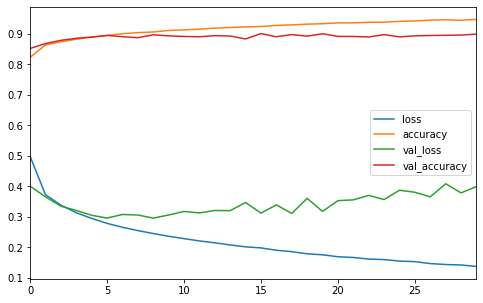

In [9]:
'''
可视化图
'''

import pandas as pd
import matplotlib as plt
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(8,5))

In [14]:
model.evaluate(x_test,y_test,batch_size=1000)

10/10 [==============================] - 0s 3ms/step - loss: 93.0916 - accuracy: 0.8596


[93.09159088134766, 0.8596000075340271]

In [16]:
x_new=x_test[:10]
y_p=model.predict(x_new)
y_p.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [17]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [18]:
model.evaluate(x_new,y_test[:10])

1/1 [==============================] - 0s 0s/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]